<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Octubre 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Manuel de Jesús Marín García
*   Matrícula: 261555

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [12]:
# 1) Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Estilo de gráficos
sns.set(style="whitegrid", rc={"figure.figsize": (7,5)})

# 1.1) Cargar datos
# Si acabas de subir el archivo con la celda 0, basta con:
df = pd.read_csv("/content/sample_data/restaurantes.csv")

# 1.2) Vista inicial
df.head()

df.describe(include='all')


,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

    * **Existe una relación lineal entre la covariable o variable independiente (población) con la variable profit lo cual nos permite aplicar un modelo de regresión lineal. Entre mayor es la población, mayor son las ganancias del restaurant.**


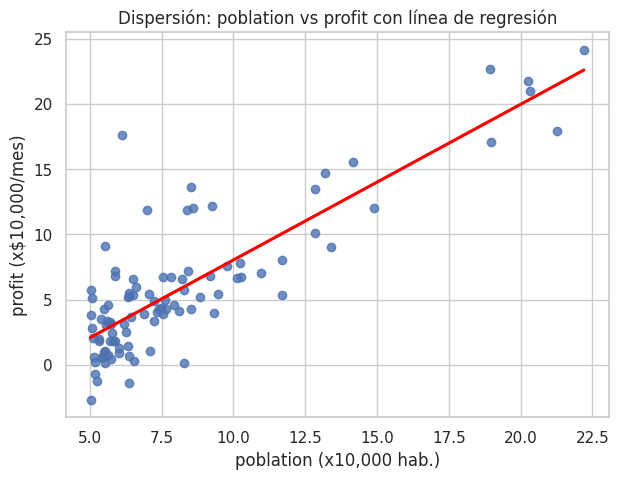

In [13]:


# Diagrama de dispersión + línea de regresión
ax = sns.regplot(data=df, x="poblation", y="profit", ci=None, line_kws={"color": "red"})
ax.set_title("Dispersión: poblation vs profit con línea de regresión")
ax.set_xlabel("poblation (x10,000 hab.)")
ax.set_ylabel("profit (x$10,000/mes)")
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?

  * **La correlación es fuerte, dado que el coeficiente de pearson tiene un valor superior a .8**

- ¿Es positiva o negativa?

  * **La correlación es positiva**

- ¿Es coherente con el gráfico anterior?

  * **Si existe coincidenciacon la grafica de dispersión**

In [15]:
# 4) Cálculo del coeficiente de correlación de Pearson
pearson_r, pearson_p = stats.pearsonr(df["poblation"], df["profit"])
print(f"Coeficiente de Pearson r = {pearson_r:.4f}")
print(f"p-valor = {pearson_p:.3e}")

# Guía de interpretación
if abs(pearson_r) >= 0.8:
    fuerza = "muy fuerte"
elif abs(pearson_r) >= 0.6:
    fuerza = "fuerte"
elif abs(pearson_r) >= 0.4:
    fuerza = "moderada"
elif abs(pearson_r) >= 0.2:
    fuerza = "débil"
else:
    fuerza = "muy débil o nula"

direccion = "positiva" if pearson_r >= 0 else "negativa"
print(f"Interpretación: relación {fuerza} y {direccion}.")




Coeficiente de Pearson r = 0.8379
p-valor = 1.023e-26
Interpretación: relación muy fuerte y positiva.


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)

    * **El valor del intercepto B0 es -3.8958**

3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?

    * **Desde el punto de vista formula de regresión lineal, el intercepto o B0 significa el valor del modelo cuando B1=0, es decir, cuando la población sea 0, lo cual es un caso no realista, el profir bajo este escenario hipotético sería de -3.8958 multiplciado por 10000**

4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

    * **El B1 significa el cambio esperado en profit por cada una unidad de población**

In [16]:
# 5) Ajuste del modelo: profit ~ poblation
X = df[["poblation"]].values  # sklearn espera 2D
y = df["profit"].values

lin = LinearRegression()
lin.fit(X, y)

intercepto = lin.intercept_
pendiente = lin.coef_[0]

print(f"Intercepto (β0) = {intercepto:.4f}")
print(f"Pendiente (β1)  = {pendiente:.4f}")




Intercepto (β0) = -3.8958
Pendiente (β1)  = 1.1930


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

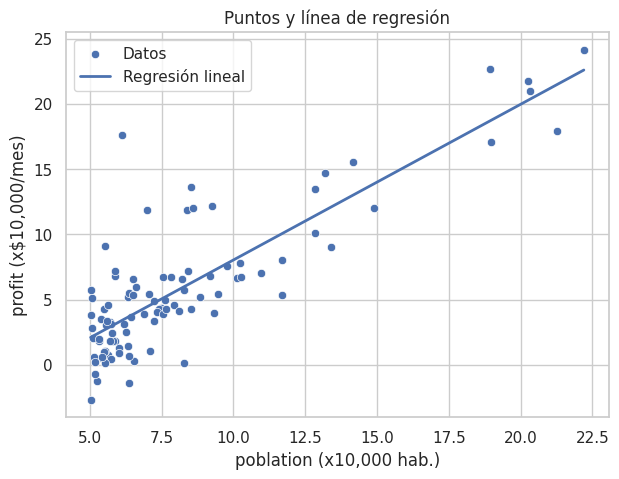

In [7]:
# 6) Puntos + línea de regresión
x_min, x_max = df["poblation"].min(), df["poblation"].max()
x_line = np.linspace(x_min, x_max, 200).reshape(-1, 1)
y_line = lin.predict(x_line)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="poblation", y="profit", label="Datos")
plt.plot(x_line, y_line, label="Regresión lineal", linewidth=2)
plt.title("Puntos y línea de regresión")
plt.xlabel("poblation (x10,000 hab.)")
plt.ylabel("profit (x$10,000/mes)")
plt.legend()
plt.show()


## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?
    * **Si, los residuos siguen una distribución normal, sin colas extremas**

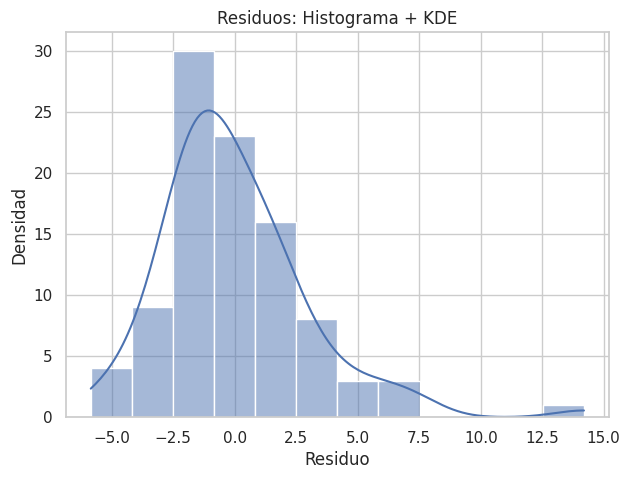

In [17]:
# 7) Residuos (reales - predichos)
y_pred = lin.predict(X)
residuos = y - y_pred

# Histograma + KDE
plt.figure(figsize=(7,5))
sns.histplot(residuos, kde=True, bins=12)
plt.title("Residuos: Histograma + KDE")
plt.xlabel("Residuo")
plt.ylabel("Densidad")
plt.show()



### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?
    * **Los residuos presentan varianza constante, es decir no se observa una relación con los predichos, por lo que los estimadores de mínimos cuadrados ordinarios se cosideran eficientes.**

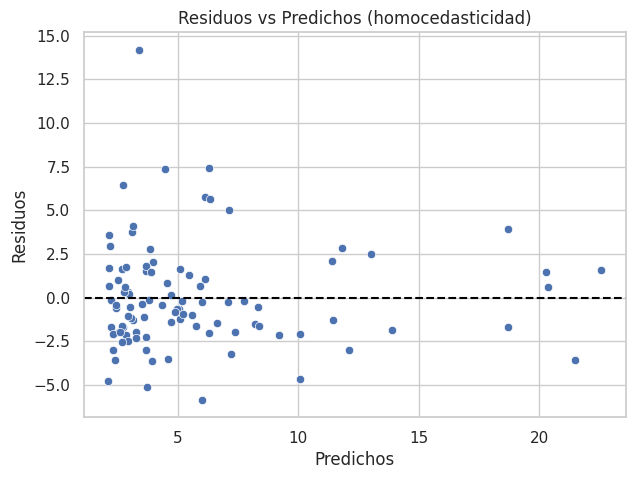

In [18]:
# 8) Residuos vs valores predichos
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, ls="--", c="black")
plt.title("Residuos vs Predichos (homocedasticidad)")
plt.xlabel("Predichos")
plt.ylabel("Residuos")
plt.show()




### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

    - **Si los puntos siguen la diagonal, la distribución de residuos es ~ normal.**

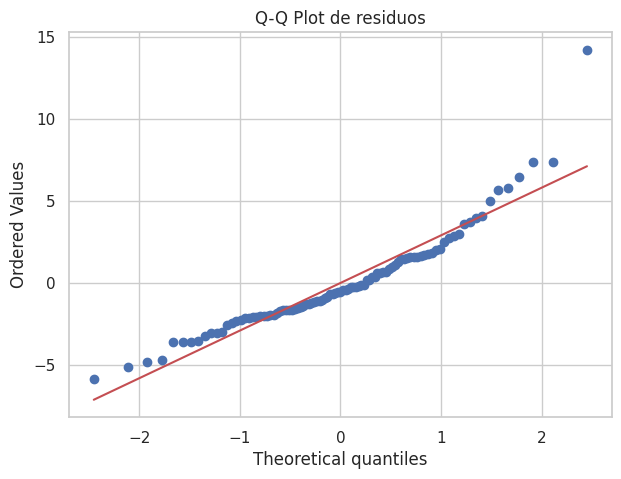

In [19]:
# 9) Q-Q Plot
import matplotlib.pyplot as plt
import scipy.stats as st

plt.figure(figsize=(7,5))
st.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de residuos")
plt.show()



## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- **MSE = 8.9539**
- **RMSE = 2.9923  (en unidades de $10,000)**
- **R² =  0.7020**
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?
    *  **El R2 nos mide la proporción de la varianza de datos que el modelos logra explicar. Es decir, explcia aproximadamente el 70.2% del universo de datos, lo que significa que el 29.8% restante no puede ser explicado por este modelo (por ruido o variables no incluidas). El error tipico de de ~30000 USD que se obtiene por medio de RMSE es un error alto, pero depende del rango de valores de la variable dependiente.**

In [11]:
# 10) Métricas de evaluación
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}  (en unidades de $10,000)")
print(f"R²   = {r2:.4f}")

# Resumen automático
utilidad = ("alta" if r2 >= 0.7 else "moderada" if r2 >= 0.5 else "limitada")
print(f"\nLectura rápida: R² ≈ {r2:.2f} → capacidad explicativa {utilidad}.")
print("RMSE te da el error típico de predicción en decenas de miles de USD/mes.")


MSE  = 8.9539
RMSE = 2.9923  (en unidades de $10,000)
R²   = 0.7020

Lectura rápida: R² ≈ 0.70 → capacidad explicativa alta.
RMSE te da el error típico de predicción en decenas de miles de USD/mes.


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
    * **Con los datos que se tiene y el valor de R2 se puede considerar un modelo relativamente bueno.**
- ¿Qué limitaciones encuentras?
    * **No existen más variables que se puedan tomar en cuenta para mejorar el modelo.**
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

  *   **Dado que los residuos son normales/homocedasticos, no hay mas opciones para mejorar el modelos con los datos actuales, al menos que se pueden agregar más covariables para aplicar un modelo de correlación lineal múltiple.**


